# DATA ANALYSIS OF EDUCATIONAL MANAGEMENT SYSTEMS

Exploratory Data Analysis (EDA) of a data set provided by the Word Bank. 
The World Bank EdStats (Education Statistics) portal is a comprehensive data and analysis source for key topics in education.
The main target of this study is to process these data in order to give business guidance to expand internationnaly our online training
programs company.

In [2]:
#! usr/bin/env python 3
# coding: utf-8

# Importing librairies

import numpy as np                # numerical data processing
import pandas as pd               # numerical tables & time series
import scipy as sp                # numerical integration, interpolation, optimization, linear algebra, and statistics
import scipy.stats as st          # statistical functions
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt   # static, animated, and interactive visualizations in Python


In [3]:
# Transforming input files.csv to dataframes

df_data = pd.read_csv("EdStatsData.csv")
df_footnote = pd.read_csv("EdStatsFootNote.csv")
df_country = pd.read_csv("EdStatsCountry.csv")
df_series = pd.read_csv("EdStatsSeries.csv")
df_countryseries = pd.read_csv("EdStatsCountry-Series.csv")


__OVERVIEW OF THE DIFFERENT INPUT FILES__


In [4]:
df_data.head(2)

# Data numbers for all indicators/region/country

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_footnote.head(2)

# Description of where the data come from

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [6]:
df_country.head(2)

# Countries economical description

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [7]:
df_series.head(2)

# Details description of indicators

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_countryseries.head(2)

# Country codes and data sources

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


__FEW FONCTIONS DEFINED TO HELP DESCRIBING THE CHARACTERISTICS OF THE INPUT FILES__

In [9]:
def duplicates (data):
    """Calculate the number of duplicates in dataframe data"""
    
    return len(data)-len(data.drop_duplicates())


def missing_cells (data):
    """Calculate the number of empty cells in dataframe data"""
    
    return data.isna().sum().sum()


def missing_cells_percent (data):
    """Calculate the percentage of empty cells in dataframe data""" 
    
    return missing_cells(data)/(data.size)*100
    

def filled_cells (data):
    """Calculate the number of existing values in dataframe data"""
    
    return data.notna().sum()  
    

def filled_cells_percent (data):
    """Calculate the percentage of existing values in dataframe data"""
    
    return filled_cells(data)/(len(data.index))*100


__CREATION OF A DATAFRAME SUMMARIZING KEY INFO FROM THE INPUT FILES__


In [10]:
# INITIALISE FILES_SPEC TO SERIES DICTIONARY

list_files = ['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv', 'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']
files_spec = {'Total rows' : pd.Series([len(df_data), len(df_footnote), len(df_country), len(df_series),
                                        len(df_countryseries)],
                        index = list_files),
              'Total columns' : pd.Series([len(df_data.columns), len(df_footnote.columns), len(df_country.columns),
                                           len(df_series.columns), len(df_countryseries.columns)],
                        index = list_files),
              'Total duplicates' : pd.Series([duplicates(df_data), duplicates(df_footnote), duplicates(df_country),
                                              duplicates(df_series), duplicates(df_countryseries)],
                        index = list_files),
              'Total Missing cells ' : pd.Series([missing_cells(df_data), missing_cells(df_footnote), missing_cells(df_country),
                                                  missing_cells(df_series), missing_cells(df_countryseries)],
                        index = list_files),
              'Missing cells (%)' : pd.Series([missing_cells_percent(df_data), missing_cells_percent(df_footnote), 
                                               missing_cells_percent(df_country), missing_cells_percent(df_series),
                                               missing_cells_percent(df_countryseries)],
                        index = list_files)}

# Creates Dataframe df_files_spec

df_files_spec = pd.DataFrame(files_spec)
index = df_files_spec.index
index. name = "Input File Name"
round(df_files_spec, 2)


,Total rows,Total columns,Total duplicates,Total Missing cells,Missing cells (%)
Input File Name,,,,,
EdStatsData.csv,886930,70,0,53455179,86.10
EdStatsFootNote.csv,643638,5,0,643638,20.00
EdStatsCountry.csv,241,32,0,2354,30.52
EdStatsSeries.csv,3665,21,0,55203,71.72
EdStatsCountry-Series.csv,613,4,0,613,25.00


__DETAILED INSPECTION OF THE LAST COLUMN "Unnamed" IN EACH FILE__


In [11]:
unnamed_col = {'Column Name' : pd.Series(['Unnamed: 69', 'Unnamed: 4', 'Unnamed: 31', 'Unnamed: 20', 'Unnamed: 3'],
                                    index = list_files),
               'Existing Data' : pd.Series([filled_cells(df_data['Unnamed: 69']), filled_cells(df_footnote['Unnamed: 4']),
                                            filled_cells(df_country['Unnamed: 31']), filled_cells(df_series['Unnamed: 20']),
                                            filled_cells(df_countryseries['Unnamed: 3'])], 
                                    index = list_files)}
                               
df_unnamed_col = pd.DataFrame(unnamed_col)
index = df_unnamed_col.index
index. name = "Input File Name"
df_unnamed_col


,Column Name,Existing Data
Input File Name,,
EdStatsData.csv,Unnamed: 69,0
EdStatsFootNote.csv,Unnamed: 4,0
EdStatsCountry.csv,Unnamed: 31,0
EdStatsSeries.csv,Unnamed: 20,0
EdStatsCountry-Series.csv,Unnamed: 3,0


__LAST COLUMN "Unnamed" DELETED IN EACH FILE (NO DATA)__


In [12]:
df_data = df_data.drop(['Unnamed: 69'], axis=1)
df_footnote = df_footnote.drop(['Unnamed: 4'], axis=1)
df_country = df_country.drop(['Unnamed: 31'], axis=1)
df_series = df_series.drop(['Unnamed: 20'], axis=1)
df_countryseries = df_countryseries.drop(['Unnamed: 3'], axis=1)


__OVERVIEW OF THE LABEL "Country Name" & ITS ASSOCIATED LABEL "Country Code" FROM df_data__


In [13]:
cols = [col for col in df_data.columns if col in ['Country Name', 'Country Code']]
df2 = df_data[cols]
df3 = df2.drop_duplicates()
df3.index = np.arange(1, len(df3)+1)
df3


,Country Name,Country Code
1,Arab World,ARB
2,East Asia & Pacific,EAS
3,East Asia & Pacific (excluding high income),EAP
4,Euro area,EMU
5,Europe & Central Asia,ECS
...,...,...
238,Virgin Islands (U.S.),VIR
239,West Bank and Gaza,PSE
240,"Yemen, Rep.",YEM
241,Zambia,ZMB


__WORLD REGIONS SEPARATION FROM INDIVIDUAL COUNTRIES & NON-GEOGRAPHIC CATEGORIES from df_data__


Among these 242 different labels 'Country Code', few describe whole regions or income based areas. 
The remaining 'Country Code' represent individual countries.

In [14]:
# List of pertinent regions ("Country Code based")

list_regions = ['EUU', 'NAC', 'SAS', 'LCN', 'ARB', 'SSF', 'MEA', 'EAS', 'ECS']
df_regions = df_data[df_data['Country Code'].isin(list_regions)] 

# List of non-geographic regions ("Country Code" based)

list_non_country = (['EMU', 'HPC', 'HIC', 'LMY', 'LDC', 'LIC', 'LMC', 'MIC',
                    'OED', 'UMC', 'WLD', 'ECA', 'LAC', 'EAP', 'SSA', 'MNA'])
df_non_country = df_data[df_data['Country Code'].isin(list_non_country)]

# List of individual countries by exclusion

list_country_left = list_regions + list_non_country
df_countries = df_data[~df_data['Country Code'].isin(list_country_left)]


__OVERVIEW OF THE NUMBER OF "Country Name" IN THE RESULTING DATAFRAMES__

In [15]:
list_subfiles = ['df_regions', 'df_non_country', 'df_countries']
subfiles_spec = {'Unique Country Name' : pd.Series([df_regions['Country Name'].nunique(), 
                                                    df_non_country['Country Name'].nunique(),
                                                    df_countries['Country Name'].nunique()],
                                         index = list_subfiles)}

# Creates Dataframe df_subfiles_spec

df_subfiles_spec = pd.DataFrame(subfiles_spec)
index = df_subfiles_spec.index
index. name = "Resulting dataframes"
df_subfiles_spec


,Unique Country Name
Resulting dataframes,
df_regions,9
df_non_country,16
df_countries,217


We obtain 3 subdataframes with:
<br> -  df_regions containing 9 geographic regions
<br> -  df_non_country containing 16 non geographic regions
<br> -  df_countries containing 217 individual countries.

__INTERNET YEARS - TIMEFRAME RESTRICTION YEARS+2000 TIL DATE OF STUDY 2016__

In [16]:
# df_Subcountry1: All data within 2000 to 2016

df_subcountry = df_countries.drop(df_countries.loc[:, '1970':'1999'].columns, axis = 1)
df_subcountry = df_subcountry.drop(df_subcountry.loc[:, '2017':'2100'].columns, axis = 1)


__DATA CLEANING: 1st PHASE - CHOICE BY EXCLUSION: INDICATORS SEMANTIC ANALYSIS__

We have 3665 unique indicators and want to go down to a few pertinent ones. 
<br> We eliminate all indicators that contain the following keywords (not pertinent with the business goals).

In [52]:
non_keywords = ['EGRA', 'Adult', 'adult', 'Elderly', 'Male', 'male', 'Inbound', 'inbound', 'outbound', 'literacy', 'Out', 
              'primary', 'Primary', 'Gini', 'ISCED ', 'Wittgenstein','PIRLS', 'Official', 'Mortality', 'Africa', 'repeaters',
              'Repetition', 'Average', 'Score','lower secondary', 'HIV', 'childhood','PISA', 'MICS', 'TIMSS', 'DHS', 'SACMEQ',
              'PASEC', 'LLECE', 'SABER', 'salaries', 'compulsory', 'gender', 'Gender', 'GDP', 'GNI', 'Population', 'Barro-Lee']

df_country_non_keywords = df_subcountry[~df_subcountry['Indicator Name'].str.contains('|'.join(non_keywords))]
len(df_country_non_keywords['Indicator Name'].unique())
#df_country_non_keywords.to_csv('nonkeywords.csv')

142

This exclusion by keywords make the number of indicators to drop from 3665 to 142.

__DATA CLEANING: 2nd PHASE - CHOICE BY EXCLUSION: AVAILABILITY OF INDICATORS__

We eliminate all indicators data that are not - at least - 50% available over the 2000-2016 period by applying a filter.

In [60]:
Filter = 0.5
limitPer = len(df_country_non_keywords.columns) * Filter
df_subcountry1 = df_country_non_keywords.dropna(thresh=limitPer, axis=0)
df_subcountry1.to_csv('subcountry1.csv')
len(df_subcountry1['Indicator Name'].unique())

136

This 2nd phase of exclusion makes the number of indicators to drop from 142 down to 136.

__DATA CLEANING: 3rd PHASE - CHOICE BY INCLUSION__


Among these 207 remaining indicators, we hand pick few that seem pertinent to our problematic.

In [54]:
Indicators=[ 'IT.NET.USER.P2', 'SP.POP.GROW', 'SL.UEM.TOTL.ZS', 'SE.SEC.ENRR', 'SE.SEC.ENRR.UP', 'SE.TER.ENRR']

df_country_indicators = df_subcountry1[df_subcountry1['Indicator Code'].isin(Indicators)]
df_country_indicators.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,13.048740,NaN,13.317080,18.664789,19.783701,...,30.083160,40.223381,46.732761,53.246830,54.616180,56.677341,56.688660,55.656158,55.644409,NaN
92968,Afghanistan,AFG,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,12.217280,NaN,7.975800,11.444510,12.105560,...,17.555300,21.803459,26.050900,32.134010,39.862740,44.565182,46.262440,43.905590,42.613129,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,...,1.900000,1.840000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726
94973,Afghanistan,AFG,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1.000000,1.100000,1.800000,8.400000,8.400000,8.500000,...,8.300000,8.200000,8.200000,8.100000,8.200000,8.000000,8.400000,8.600000,8.600000,8.600000
96625,Albania,ALB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,71.452797,72.905159,73.002861,75.018990,74.170280,76.887062,...,81.280869,83.648918,85.409309,88.411636,90.848351,92.741470,95.831573,96.426086,95.765488,NaN
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,15.603730,15.974960,16.431709,16.805559,20.055540,23.311100,...,30.653669,32.077801,33.400749,44.540649,49.670399,58.565491,62.547760,62.706848,58.109951,NaN
96633,Albania,ALB,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,43.697090,45.356331,48.959530,51.771450,54.278069,58.653580,...,67.139008,71.086517,72.855003,78.937408,86.112183,89.405228,93.003021,93.927422,89.460274,NaN
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,...,15.036115,23.860000,41.200000,45.000000,49.000000,54.655959,57.200000,60.100000,63.252933,66.363445


__MERGE INFO 'Region' FROM 'df_Country' WITH 'df_Data'__ 

To relate the different countries with their corresponding region, we import the 'Region' column from dataframe df_country into a new dataframe where all useful information are gathered.

In [55]:
# We create a subdataframe by extracting the columns Country Code & Region from dataframe df_country

col_list = ['Country Code', 'Region']
df_countrysubset = df_country[col_list]

# We then merge this subdataframe with df_country_indicators

df_indic_combined = pd.merge(df_country_indicators, df_countrysubset) 

# We replace the column 'Region' from the end of the dataframe to a more readable position

column_to_move = df_indic_combined.pop("Region")
df_indic_combined.insert(2, "Region", column_to_move)
df_indic_combined.to_csv('Combined.csv')
round(df_indic_combined.head(6)) 


,Country Name,Country Code,Region,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,13.0,NaN,13.0,19.0,...,30.0,40.0,47.0,53.0,55.0,57.0,57.0,56.0,56.0,NaN
1,Afghanistan,AFG,South Asia,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,12.0,NaN,8.0,11.0,...,18.0,22.0,26.0,32.0,40.0,45.0,46.0,44.0,43.0,NaN
2,Afghanistan,AFG,South Asia,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.0,0.0,0.0,0.0,...,2.0,2.0,4.0,4.0,5.0,5.0,6.0,7.0,8.0,11.0
3,Afghanistan,AFG,South Asia,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1.0,1.0,2.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0
4,Albania,ALB,Europe & Central Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,71.0,73.0,73.0,75.0,74.0,...,81.0,84.0,85.0,88.0,91.0,93.0,96.0,96.0,96.0,NaN
5,Albania,ALB,Europe & Central Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,16.0,16.0,16.0,17.0,20.0,...,31.0,32.0,33.0,45.0,50.0,59.0,63.0,63.0,58.0,NaN


**DISPLAY OF THE PERTINENT INDICATORS**

We generate a dataframe that lists the remaining indicators and their meaning.

In [56]:
series_indic = df_series[df_series['Series Code'].isin(Indicators)]

list_indicators = pd.DataFrame(columns=['Series Code', 'Long definition', 'Topic'])

for indic in series_indic.iterrows():
   
        list_indicators = list_indicators.append(pd.DataFrame([[indic[1]['Series Code'], indic[1]['Long definition'], indic[1]['Topic']]],
                                                              columns=['Series Code','Long definition', 'Topic']))
        list_indicators.index = np.arange(1, len(list_indicators)+1)

        list_indicators.to_csv("List_indicators.csv")
list_indicators

,Series Code,Long definition,Topic
1,IT.NET.USER.P2,Internet users are individuals who have used t...,Infrastructure: Communications
2,SE.SEC.ENRR,"Total enrollment in secondary education, regar...",Secondary
3,SE.SEC.ENRR.UP,"Total enrollment in upper secondary education,...",Secondary
4,SE.TER.ENRR,Total enrollment in tertiary education (ISCED ...,Tertiary
5,SL.UEM.TOTL.ZS,Unemployment refers to the share of the labor ...,Social Protection & Labor: Unemployment
6,SP.POP.GROW,Annual population growth rate for year t is th...,Health: Population: Dynamics


__OVERVIEW OF THE MEAN VALUES PER INDICATOR & YEAR__

In [22]:
indic_code = df_indic_combined.groupby(['Indicator Code']).mean()
indic_code.round(2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Code,,,,,,,,,,,,,,,,,
IT.NET.USER.P2,8.76,10.78,13.66,16.28,18.71,20.95,23.53,25.60,28.43,31.12,34.26,36.97,40.02,42.85,45.79,48.79,51.41
SE.SEC.ENRR,74.27,73.30,76.28,79.29,76.55,76.81,77.85,80.16,80.51,81.86,82.99,82.33,83.92,87.49,89.46,88.35,83.04
SE.SEC.ENRR.UP,67.03,66.28,68.95,71.16,68.89,69.19,69.95,71.06,70.96,72.07,74.60,74.65,77.52,80.93,83.76,83.04,70.65
SE.TER.ENRR,30.17,31.12,32.81,33.27,34.50,35.10,36.82,38.11,38.88,39.91,41.08,42.20,43.81,45.73,46.77,46.71,18.08
SL.UEM.TOTL.ZS,9.29,9.41,9.51,9.56,9.38,9.08,8.68,8.40,8.15,8.96,9.13,9.12,9.13,9.11,8.99,8.83,8.69
SP.POP.GROW,1.41,1.44,1.46,1.45,1.49,1.52,1.56,1.55,1.55,1.45,1.42,1.38,1.39,1.36,1.32,1.31,1.29


## __BIVARIATE ANALYSIS__

__CORRELATION MATRIX:__ Investigation of the dependence between all indicators at the same time

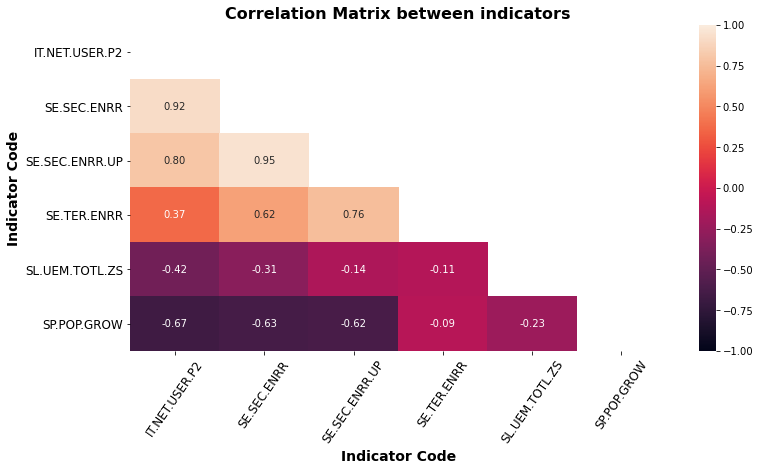

In [23]:
correlation_mat = indic_code.transpose().corr()

plt.figure(figsize=(12,6))

tricor = np.triu(correlation_mat)
res = sns.heatmap(correlation_mat, vmin=-1, vmax=1, center= None, annot = True, fmt='.2f', annot_kws={"size": 10}, mask=tricor)
plt.title('Correlation Matrix between indicators', fontsize = 16, weight = 'bold')
plt.xlabel ('Indicator Code', fontsize=14, weight = 'bold')
plt.ylabel ('Indicator Code', fontsize=14, weight = 'bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12, rotation=55)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, rotation=0)

plt.show()


__Interactions between continuous variables using seaborn pairplot__

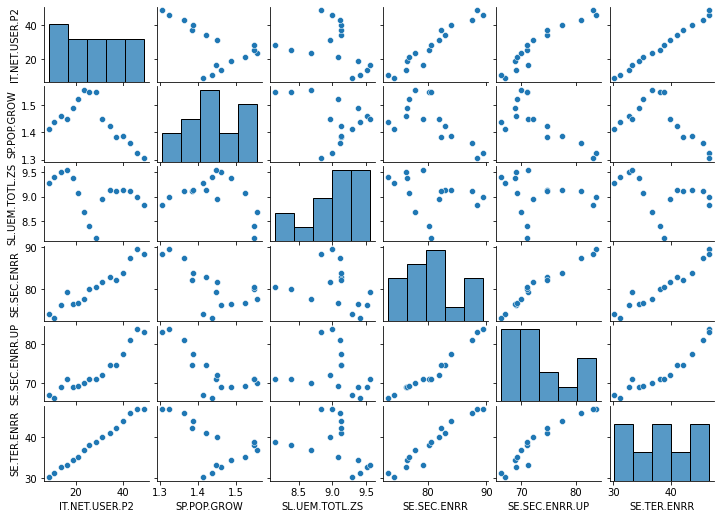

In [24]:
invert_code = indic_code.T

dispersion = invert_code[(Indicators)].loc[:'2015']

scatter = sns.pairplot(dispersion)
scatter.fig.set_size_inches(10,7)

We regroup the indicators by region and country to have an idea of the average value

In [25]:
regions_list = df_indic_combined.groupby(['Region', 'Indicator Code']).mean()

country_list = df_indic_combined.groupby(['Country Name', 'Indicator Code']).mean()
regions_list.round(2)
country_list.round(2)

2000   2001   2002   2003   2004   2005   2006  \
Country Name Indicator Code                                                    
Afghanistan  IT.NET.USER.P2    NaN   0.00   0.00   0.09   0.11   1.22   2.11   
             SE.SEC.ENRR       NaN  13.05    NaN  13.32  18.66  19.78  29.93   
             SE.SEC.ENRR.UP    NaN  12.22    NaN   7.98  11.44  12.11  16.97   
             SL.UEM.TOTL.ZS   1.00   1.10   1.80   8.40   8.40   8.50   8.40   
             SP.POP.GROW      3.49   4.25   4.72   4.82   4.47   3.87   3.23   
...                            ...    ...    ...    ...    ...    ...    ...   
Zambia       SL.UEM.TOTL.ZS  12.90  13.70  12.70  15.50  15.50  15.90  14.30   
             SP.POP.GROW      2.81   2.74   2.70   2.68   2.68   2.69   2.71   
Zimbabwe     IT.NET.USER.P2   0.40   0.80   1.10   1.80   2.10   2.40   2.40   
             SL.UEM.TOTL.ZS   4.70   6.10   5.20   4.50   4.20   4.80   5.60   
             SP.POP.GROW      1.30   1.17   1.08   1.06   1.13   1.26   1.41   

                              2007   2008   2009   2010   2011   2012   2013  \
Country Name Indicator Code                                                    
Afghanistan  IT.NET.USER.P2   1.90   1.84   3.55   4.00   5.00   5.45   5.90   
             SE.SEC.ENRR     30.08  40.22  46.73  53.25  54.62  56.68  56.69   
             SE.SEC.ENRR.UP  17.56  21.80  26.05  32.13  39.86  44.57  46.26   
             SL.UEM.TOTL.ZS   8.30   8.20   8.20   8.10   8.20   8.00   8.40   
             SP.POP.GROW      2.76   2.51   2.57   2.81   3.10   3.27   3.32   
...                            ...    ...    ...    ...    ...    ...    ...   
Zambia       SL.UEM.TOTL.ZS  12.10   7.90   8.60  10.80  13.60   7.80   7.80   
             SP.POP.GROW      2.73   2.76   2.82   2.88   2.95   3.01   3.04   
Zimbabwe     IT.NET.USER.P2   3.00   3.50   4.00   6.40   8.40  12.00  15.50   
             SL.UEM.TOTL.ZS   5.50   5.40   5.50   6.20   5.40   5.30   5.20   
             SP.POP.GROW      1.55   1.70   1.84   1.98   2.11   2.23   2.31   

                              2014   2015   2016  
Country Name Indicator Code                       
Afghanistan  IT.NET.USER.P2   7.00   8.26  10.60  
             SE.SEC.ENRR     55.66  55.64    NaN  
             SE.SEC.ENRR.UP  43.91  42.61    NaN  
             SL.UEM.TOTL.ZS   8.60   8.60   8.60  
             SP.POP.GROW      3.18   2.94   2.69  
...                            ...    ...    ...  
Zambia       SL.UEM.TOTL.ZS   7.70   7.70   7.60  
             SP.POP.GROW      3.04   3.02   3.00  
Zimbabwe     IT.NET.USER.P2  16.36  22.74  23.12  
             SL.UEM.TOTL.ZS   5.10   5.10   5.20  
             SP.POP.GROW      2.34   2.35   2.34  

[1028 rows x 17 columns]

__TRENDS OF THE DIFFERENT INDICATORS OVER TIME__

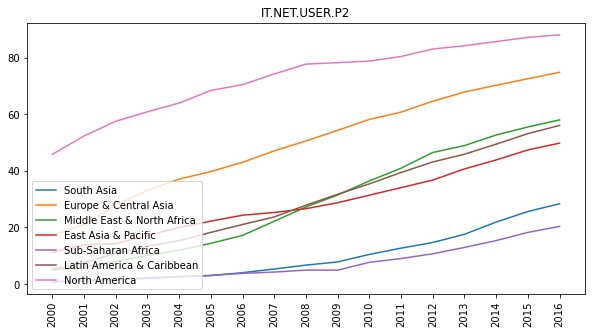

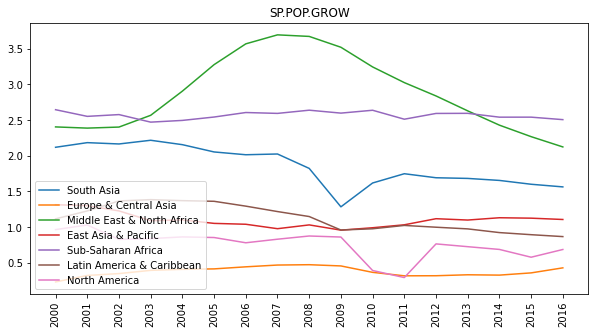

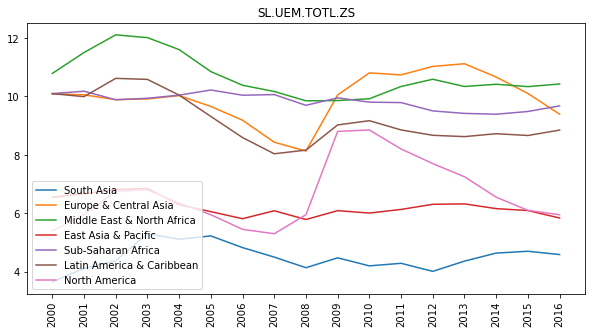

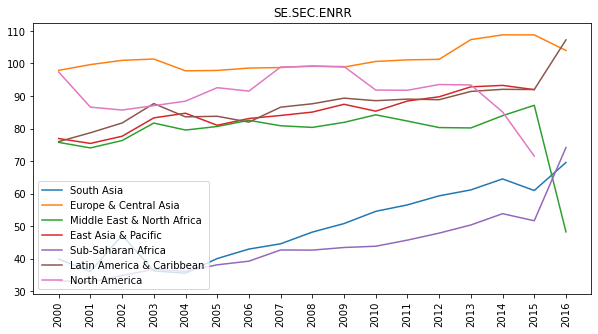

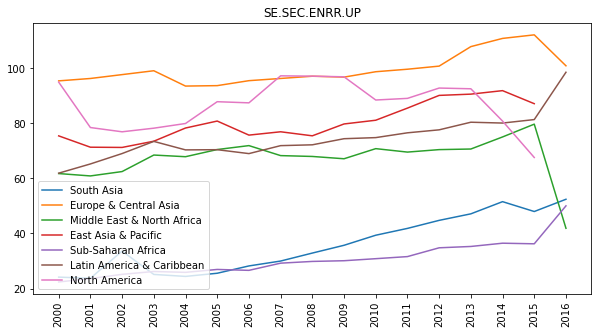

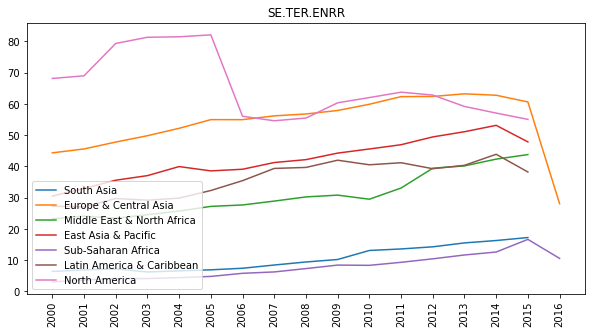

In [26]:
#Indicators = [ 'IT.NET.USER.P2', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']

for match in Indicators:
    
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes()
    plt.title(match)
    plt.xticks(rotation=90)
    
    for area in df_indic_combined['Region'].dropna().unique():
            ax.plot(regions_list.loc[area,match], label=area)
            plt.legend(loc='lower left')

__RANKINGS OF CANDIDATES REGIONS - MEAN__

In [27]:
# We merge the scoring dataframe and the indicators dataframe through the column 'Region'
# Achieved with a MEAN for all indicators over the period 2000-2016

region_scores = pd.DataFrame(regions_list.mean(axis=1).groupby(['Region']).mean())
region_overall_rating = pd.DataFrame([region_scores.index,region_scores.values]).T
region_overall_rating.columns = ['Region', 'Score 1']
region_overall_rating['Score 1'] = region_overall_rating['Score 1'].astype(float, errors = 'raise')

df_regions_list = pd.DataFrame(regions_list.mean(axis=1))
df_indic_region = df_regions_list.rename(columns={0: 'Values'})
df_indic_region.reset_index(inplace=True)

df_pivot = df_indic_region.pivot(index='Region', columns='Indicator Code', values='Values')

result_regions = pd.merge(region_overall_rating, df_pivot, on="Region")
result_regions = result_regions.sort_values(by=['Score 1'], ascending=False)
result_regions.index = np.arange(1, len(result_regions)+1)
result_regions.round(2)


,Region,Score 1,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SL.UEM.TOTL.ZS,SP.POP.GROW
1,North America,53.84,72.71,90.82,86.63,65.48,6.66,0.75
2,Europe & Central Asia,52.44,49.35,101.32,99.52,54.10,9.96,0.38
3,East Asia & Pacific,40.57,28.62,85.00,80.28,42.21,6.23,1.10
4,Latin America & Caribbean,39.56,29.19,87.40,74.53,35.95,9.18,1.12
5,Middle East & North Africa,36.59,28.91,78.81,67.35,30.88,10.67,2.88
6,South Asia,18.69,9.72,49.91,35.77,10.36,4.50,1.86
7,Sub-Saharan Africa,16.99,7.20,43.98,30.64,7.74,9.83,2.57


__RANKING OF CANDIDATES REGIONS - DIFFERENT AVERAGING__

In [28]:
# We divide our dataframe into 3 subdataframes to get the last value, the mean and max of different indicators
# As the internet users curve keeps increasing since 2000, the last value seems more representative than an average

region_net = df_indic_combined[df_indic_combined["Indicator Code"] == 'IT.NET.USER.P2']
region_net = region_net.groupby(['Region', 'Indicator Code']).mean()
df_region_net = pd.DataFrame(region_net.iloc[:,-1]) 

region_grow = df_indic_combined[df_indic_combined["Indicator Code"].isin(['SP.POP.GROW', 'SL.UEM.TOTL.ZS'])]
region_grow = region_grow.groupby(['Region', 'Indicator Code']).mean()
df_region_grow = pd.DataFrame(region_grow.mean(axis=1)) 

Li = ['SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']

region_enrr = df_indic_combined[df_indic_combined["Indicator Code"].isin(Li)]
region_enrr = region_enrr.groupby(['Region', 'Indicator Code']).mean()
df_region_enrr = pd.DataFrame(region_enrr.median(axis=1))

# We re-create a dataframe from the 3 subdataframes

Average = df_region_grow.merge(df_region_enrr,how='outer',left_on=['Region','Indicator Code'],right_on=['Region', 'Indicator Code'])
Av = Average.merge(df_region_net,how='outer',left_on=['Region','Indicator Code'],right_on=['Region', 'Indicator Code'])
Av = Av.mean(axis=1)
df_Av = pd.DataFrame (Av)
df_Av = df_Av.rename(columns={0: 'Values'})
df_Av.reset_index(inplace=True)
df_pivot1 = df_Av.pivot(index='Region', columns='Indicator Code', values='Values')

SCORE = pd.DataFrame(Av.groupby(['Region']).mean())

RATINGS = pd.DataFrame([SCORE.index,SCORE.values]).T
RATINGS.columns = ['Region', 'Score 2']
RATINGS['Score 2'] = RATINGS['Score 2'].astype(float, errors = 'raise')

# We merge our RATINGS dataframe with our indicators dataframe df_pivot1

result_region_bis = pd.merge(RATINGS, df_pivot, on="Region")
result_region_bis = result_region_bis.sort_values(by=['Score 2'], ascending=False)
result_region_bis.index = np.arange(1, len(result_region_bis)+1)
result_region_bis.round(2)


,Region,Score 2,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SL.UEM.TOTL.ZS,SP.POP.GROW
1,Europe & Central Asia,56.59,49.35,101.32,99.52,54.10,9.96,0.38
2,North America,56.29,72.71,90.82,86.63,65.48,6.66,0.75
3,Latin America & Caribbean,44.35,29.19,87.40,74.53,35.95,9.18,1.12
4,East Asia & Pacific,43.78,28.62,85.00,80.28,42.21,6.23,1.10
5,Middle East & North Africa,41.63,28.91,78.81,67.35,30.88,10.67,2.88
6,South Asia,20.90,9.72,49.91,35.77,10.36,4.50,1.86
7,Sub-Saharan Africa,18.76,7.20,43.98,30.64,7.74,9.83,2.57


__RANKING OF CANDIDATE COUNTRIES - MEAN__

In [29]:
# We merge the scoring dataframe and the indicators dataframe through the column 'Region'
# Achieved with a MEAN for all indicators over the period 2000-2016

country_scores = pd.DataFrame(country_list.mean(axis=1).groupby(['Country Name']).mean())

country_overall_rating = pd.DataFrame([country_scores.index,country_scores.values]).T
country_overall_rating.columns = ['Country Name', 'Score 1']
country_overall_rating['Score 1'] = country_overall_rating['Score 1'].astype(float, errors = 'raise')
country_overall_rating = country_overall_rating.sort_values(by= ['Score 1'], ascending=False)
country_overall_rating.index = np.arange(1, len(country_overall_rating)+1)

df_country_new = pd.DataFrame(country_list.mean(axis=1))
df_country_new = df_country_new.rename(columns={0: 'Values'})
df_country_new.reset_index(inplace=True)

df_pivot_country = df_country_new.pivot(index='Country Name', columns='Indicator Code', values='Values')

result_countries = pd.merge(country_overall_rating, df_pivot_country, on="Country Name")
result_countries = result_countries.sort_values(by=['Score 1'], ascending=False)
result_countries.index = np.arange(1, len(result_countries)+1)
result_countries.head(10).round(2)


,Country Name,Score 1,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SL.UEM.TOTL.ZS,SP.POP.GROW
1,Australia,81.88,72.75,141.15,193.91,76.50,5.52,1.43
2,Finland,72.84,76.65,120.89,140.07,90.29,8.78,0.36
3,Denmark,69.37,81.44,124.38,130.31,74.13,5.54,0.44
4,Sweden,68.71,83.06,118.16,130.77,72.69,6.93,0.66
5,New Zealand,68.21,72.00,117.49,135.92,77.57,5.11,1.19
6,Liechtenstein,67.88,72.93,110.13,121.77,33.74,NaN,0.81
7,Norway,67.53,85.05,113.31,127.45,74.80,3.61,0.94
8,Belgium,65.44,64.88,129.46,125.20,64.84,7.64,0.61
9,Spain,64.95,54.19,120.24,125.13,73.37,15.94,0.82
10,Iceland,64.84,86.28,110.14,118.55,68.84,4.14,1.10


__MEAN MEDIAN MAX COUNTRIES__

In [30]:
# We divide our dataframe into 3 subdataframes to get the last value, the mean and max of different indicators
# Last value on Indicator 'IT.NET.USER.P2'
country_net = df_indic_combined[df_indic_combined["Indicator Code"] == 'IT.NET.USER.P2']
country_net = country_net.groupby(['Country Name', 'Indicator Code']).mean()
df_country_net = pd.DataFrame(country_net.iloc[:,-1:]) 

# Mean value on 'SP.POP.GROW' & 'SL.UEM.TOTL.ZS'
country_grow = df_indic_combined[df_indic_combined["Indicator Code"].isin(['SP.POP.GROW', 'SL.UEM.TOTL.ZS'])]
country_grow = country_grow.groupby(['Country Name', 'Indicator Code']).mean()
df_country_grow = pd.DataFrame(country_grow.mean(axis=1))

# Median value on the remaining
Li1 = ['SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']
country_enrr = df_indic_combined[df_indic_combined["Indicator Code"].isin(Li1)]
country_enrr = country_enrr.groupby(['Country Name', 'Indicator Code']).mean()
df_country_enrr = pd.DataFrame(country_enrr.median(axis=1))

# We re-create a dataframe from the 3 subdataframes

Average_country = df_country_net.merge(df_country_grow,how='outer',left_on=['Country Name','Indicator Code'],right_on=['Country Name', 'Indicator Code'])
Av_country = Average_country.merge(df_country_enrr,how='outer',left_on=['Country Name','Indicator Code'],right_on=['Country Name', 'Indicator Code'])
Av1 = Av_country.mean(axis=1)
df_Av1 = pd.DataFrame (Av1)
df_Av1 = df_Av1.rename(columns={0: 'Values'})
df_Av1.reset_index(inplace=True)

df_pivot2 = df_Av1.pivot(index='Country Name', columns='Indicator Code', values='Values')

SCORE2 = pd.DataFrame(Av1.groupby(['Country Name']).mean())
RATINGS2 = pd.DataFrame([SCORE2.index,SCORE2.values]).T
RATINGS2.columns = ['Country Name', 'Score 2']
RATINGS2['Score 2'] = RATINGS2['Score 2'].astype(float, errors = 'raise')

# We then merge the 2 dataframes RATINGS2 & df_pivot2

result_country_bis = pd.merge(RATINGS2, df_pivot2, on="Country Name")
result_country_bis = result_country_bis.sort_values(by=['Score 2'], ascending=False)
result_country_bis.index = np.arange(1, len(result_country_bis)+1)

result_country_bis.head(10).round(2)


,Country Name,Score 2,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SL.UEM.TOTL.ZS,SP.POP.GROW
1,Australia,81.36,88.24,137.56,181.99,73.39,5.52,1.43
2,Liechtenstein,73.08,98.09,110.37,121.71,34.44,NaN,0.81
3,Denmark,72.06,96.97,123.93,129.23,76.25,5.54,0.44
4,New Zealand,71.46,88.47,117.85,135.97,80.18,5.11,1.19
5,Finland,70.24,87.70,111.79,121.34,91.45,8.78,0.36
6,Norway,69.36,97.30,113.12,126.81,74.39,3.61,0.94
7,Spain,68.16,80.56,117.61,123.51,70.52,15.94,0.82
8,Iceland,67.05,98.24,109.09,117.55,72.19,4.14,1.10
9,Netherlands,65.60,90.41,122.72,114.88,60.64,4.49,0.43
10,St. Kitts and Nevis,64.66,76.82,94.48,86.15,NaN,NaN,1.18


In [31]:
cap = len(result_country_bis.columns) * 0.9
result_country_proc = result_country_bis.dropna(thresh=cap, axis=0)

result_country_proc.head(15).round(2)


,Country Name,Score 2,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SL.UEM.TOTL.ZS,SP.POP.GROW
1,Australia,81.36,88.24,137.56,181.99,73.39,5.52,1.43
3,Denmark,72.06,96.97,123.93,129.23,76.25,5.54,0.44
4,New Zealand,71.46,88.47,117.85,135.97,80.18,5.11,1.19
5,Finland,70.24,87.70,111.79,121.34,91.45,8.78,0.36
6,Norway,69.36,97.30,113.12,126.81,74.39,3.61,0.94
7,Spain,68.16,80.56,117.61,123.51,70.52,15.94,0.82
8,Iceland,67.05,98.24,109.09,117.55,72.19,4.14,1.10
9,Netherlands,65.60,90.41,122.72,114.88,60.64,4.49,0.43
11,Ireland,63.95,82.17,112.89,122.38,56.73,8.11,1.41
14,Sweden,63.43,91.51,103.87,104.94,72.70,6.93,0.66


__COMPARISON BETWEEN 2 METHODS OF AVERAGING__

In [32]:
df = pd.concat([result_countries[['Country Name', 'Score 1']],result_country_bis[['Country Name', 'Score 2']]], axis=1)
df.head(10).round(2)


,Country Name,Score 1,Country Name,Score 2
1,Australia,81.88,Australia,81.36
2,Finland,72.84,Liechtenstein,73.08
3,Denmark,69.37,Denmark,72.06
4,Sweden,68.71,New Zealand,71.46
5,New Zealand,68.21,Finland,70.24
6,Liechtenstein,67.88,Norway,69.36
7,Norway,67.53,Spain,68.16
8,Belgium,65.44,Iceland,67.05
9,Spain,64.95,Netherlands,65.60
10,Iceland,64.84,St. Kitts and Nevis,64.66


__Impact of increasing filter value over indicators selection__

In [33]:
#for i in range (0, 110, 10):
#    Filter = i/100
#    limitPer = len(df_country_non_keywords.columns) * Filter
#    df_subcountry1 = df_country_non_keywords.dropna(thresh=limitPer, axis=0)

#    def reduce (data):
#        return len(data.unique())

#    print(reduce(df_subcountry1['Indicator Name']))